In [87]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [88]:
#setup 

k = 10                 #number of arms in the bandit
steps = 1000           #number of time steps (plays)
epsilon = 0.1          #exploration rate
runs = 2000            #number of experiments (averaging)

In [89]:
#Bandit class
class Bandit:
    def __init__(self):
        self.true_values = np.random.randn(10)   #generates the 10 random number from sample N(0,1)

    def get_reward(self,action):
        #get a true value for this action
        true_values = self.true_values[action]

        #add random noise from N(0,1) to the true value
        reward = true_values + np.random.randn()
        return reward

In [90]:
#E-greedy agent class
class EpsilonGreedyAgent:
    def __init__(self, epsilon):
        self.epsilon = epsilon
        self.Q = np.zeros(10)  #estimated action values all starts at 0
        self.N = np.zeros(10)  #action counts all starts at 0

    def select_action(self):
        #exploration part
        if np.random.rand() < self.epsilon:
            action = np.random.randint(10)
        #exploitation part
        else:
            action = np.argmax(self.Q)
        return action

    def update(self, action, reward):
        self.N[action] += 1
        step_size = 1.0/self.N[action]
        error = reward - self.Q[action]
        self.Q[action] = self.Q[action] + step_size*error

In [91]:
def run_testbed(num_problems=2000, num_steps=1000, epsilon=epsilon):
    #creating array to store sum of rewards at each time step.
    total_rewards = np.zeros(num_steps)

    for problem in range(num_problems):
        #print progress after every 200 problems
        if (problem+1)%200 == 0:
            print(f"{problem+1} problems completed out of {num_problems}")

        #create a new bandit problem
        bandit = Bandit()

        #create a new agent that knows nothing initially
        agent = EpsilonGreedyAgent(epsilon = epsilon)

        #run this problem num_steps times
        for step in range(num_steps):
            #agent selects an action using e-greedy method
            action = agent.select_action()

            #bandit gives the reward for that action
            reward = bandit.get_reward(action)
            
            #agent updates it's estimates based on the reward
            agent.update(action, reward)

            #recording this reward
            total_rewards[step] += reward
            
    avg_rewards = total_rewards / num_problems

    return avg_rewards
            

In [92]:
def run_testbed(num_problems=2000, num_steps=1000, epsilon=epsilon):
    #creating array to store sum of rewards at each time step.
    total_rewards = np.zeros(num_steps)

    for problem in range(num_problems):
        #print progress after every 200 problems
        if (problem+1)%200 == 0:
            print(f"{problem+1} problems completed out of {num_problems} for epsilon: {epsilon}")

        #create a new bandit problem
        bandit = Bandit()

        #create a new agent that knows nothing initially
        agent = EpsilonGreedyAgent(epsilon = epsilon)

        #run this problem num_steps times
        for step in range(num_steps):
            #agent selects an action using e-greedy method
            action = agent.select_action()

            #bandit gives the reward for that action
            reward = bandit.get_reward(action)
            
            #agent updates it's estimates based on the reward
            agent.update(action, reward)

            #recording this reward
            total_rewards[step] += reward

    avg_rewards = total_rewards / num_problems

    return avg_rewards
            

In [93]:
if __name__ == "__main__":
    print("starting 10 arm bandit testbed......")

    avg_rewards = run_testbed(num_problems=2000, num_steps=1000, epsilon=0.1) #E-Greedy approach
    avg_rewards2 = run_testbed(num_problems=2000, num_steps=1000, epsilon=0.0)    #Greedy approach
    avg_rewards3 = run_testbed(num_problems=2000, num_steps=1000, epsilon=0.2)    #E-Greedy approach
    print("simulation completed!.......")

starting 10 arm bandit testbed......
200 problems completed out of 2000 for epsilon: 0.1
400 problems completed out of 2000 for epsilon: 0.1
600 problems completed out of 2000 for epsilon: 0.1
800 problems completed out of 2000 for epsilon: 0.1
1000 problems completed out of 2000 for epsilon: 0.1
1200 problems completed out of 2000 for epsilon: 0.1
1400 problems completed out of 2000 for epsilon: 0.1
1600 problems completed out of 2000 for epsilon: 0.1
1800 problems completed out of 2000 for epsilon: 0.1
2000 problems completed out of 2000 for epsilon: 0.1
200 problems completed out of 2000 for epsilon: 0.0
400 problems completed out of 2000 for epsilon: 0.0
600 problems completed out of 2000 for epsilon: 0.0
800 problems completed out of 2000 for epsilon: 0.0
1000 problems completed out of 2000 for epsilon: 0.0
1200 problems completed out of 2000 for epsilon: 0.0
1400 problems completed out of 2000 for epsilon: 0.0
1600 problems completed out of 2000 for epsilon: 0.0
1800 problems com

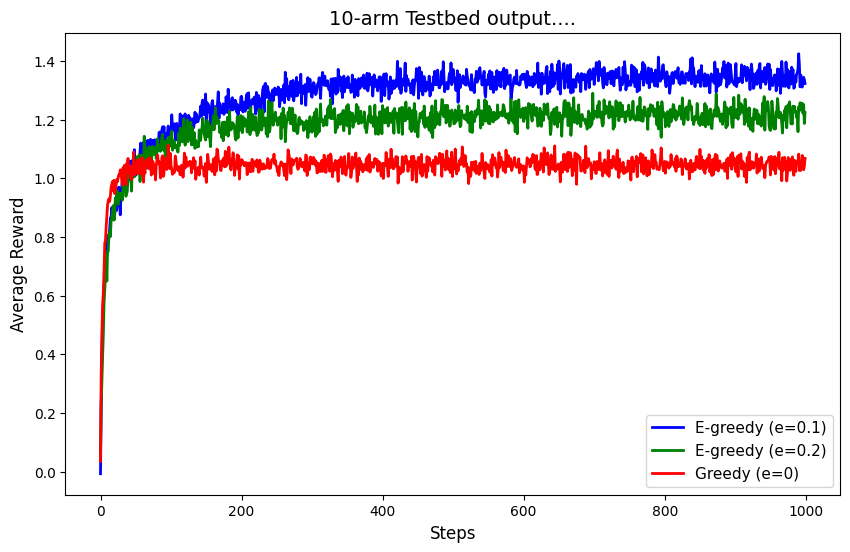

In [99]:
    #plotting the results
    plt.figure(figsize=(10,6))
    plt.plot(avg_rewards, linewidth=2, label='E-greedy (e=0.1)', color='blue')
    plt.plot(avg_rewards3, linewidth=2, label='E-greedy (e=0.2)', color='green')
    plt.plot(avg_rewards2, linewidth=2, label='Greedy (e=0)', color='red')
    plt.xlabel('Steps', fontsize=12)
    plt.ylabel('Average Reward', fontsize=12)
    plt.title('10-arm Testbed output....', fontsize=14)
    plt.legend(fontsize=11)